As we didn't launch the ozonesonde before the **2019** convection case successfully, we have to compare the O3 profiles focasted by WACCM.

If the forcast O3 profile has the same trend but not the large difference detected by ozonesondes, the convective effect is shown. 

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import proplot as plot
from datetime import timedelta

## Set basic parameters

In [2]:
f_waccm = '../data/reanalysis/waccm/waccm-20190723.nc'
# set the region same as that comp_wrf_radar.ipynb
extend = [118.5, 119.5, 31.5, 32.5]
t1 = '2019-07-23 06:00'
t2 = '2019-07-25 06:00'

## Read data

In [3]:
ds = xr.open_dataset(f_waccm)
ds

<xarray.Dataset>
Dimensions:       (ilev: 89, lat: 32, lev: 88, lon: 25, nbnd: 2, time: 20)
Coordinates:
  * ilev          (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 985.0 1e+03
  * lat           (lat) float64 20.26 21.2 22.15 23.09 ... 47.59 48.53 49.48
  * lev           (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 977.5 992.5
  * lon           (lon) float64 100.0 101.2 102.5 103.8 ... 127.5 128.8 130.0
  * time          (time) datetime64[ns] 2019-07-13 ... 2019-07-17T18:00:00
Dimensions without coordinates: nbnd
Data variables:
    ALKNIT        (time, lev, lat, lon) float32 ...
    AODVISdn      (time, lat, lon) float32 ...
    BCARY         (time, lev, lat, lon) float32 ...
    BENZENE       (time, lev, lat, lon) float32 ...
    BIGALD        (time, lev, lat, lon) float32 ...
    BIGALD1       (time, lev, lat, lon) float32 ...
    BIGALD2       (time, lev, lat, lon) float32 ...
    BIGALD3       (time, lev, lat, lon) float32 ...
    BIGALD4       (time, lev, lat, lon) float32 ...
    BIGALK        (time, lev, lat, lon) float32 ...
    BIGENE        (time, lev, lat, lon) float32 ...
    C2H2          (time, lev, lat, lon) float32 ...
    C2H4          (time, lev, lat, lon) float32 ...
    C2H5OH        (time, lev, lat, lon) float32 ...
    C2H6          (time, lev, lat, lon) float32 ...
    C3H6          (time, lev, lat, lon) float32 ...
    C3H8          (time, lev, lat, lon) float32 ...
    CH2O          (time, lev, lat, lon) float32 ...
    CH3CHO        (time, lev, lat, lon) float32 ...
    CH3CN         (time, lev, lat, lon) float32 ...
    CH3COCH3      (time, lev, lat, lon) float32 ...
    CH3COCHO      (time, lev, lat, lon) float32 ...
    CH3COOH       (time, lev, lat, lon) float32 ...
    CH3OH         (time, lev, lat, lon) float32 ...
    CH3OOH        (time, lev, lat, lon) float32 ...
    CH4           (time, lev, lat, lon) float32 ...
    CO            (time, lev, lat, lon) float32 ...
    CO01          (time, lev, lat, lon) float32 ...
    CO02          (time, lev, lat, lon) float32 ...
    CO03          (time, lev, lat, lon) float32 ...
    CO04          (time, lev, lat, lon) float32 ...
    CO05          (time, lev, lat, lon) float32 ...
    CO06          (time, lev, lat, lon) float32 ...
    CO07          (time, lev, lat, lon) float32 ...
    CO08          (time, lev, lat, lon) float32 ...
    CO09          (time, lev, lat, lon) float32 ...
    CRESOL        (time, lev, lat, lon) float32 ...
    DMS           (time, lev, lat, lon) float32 ...
    GLYOXAL       (time, lev, lat, lon) float32 ...
    H2O           (time, lev, lat, lon) float32 ...
    H2O2          (time, lev, lat, lon) float32 ...
    HCN           (time, lev, lat, lon) float32 ...
    HCOOH         (time, lev, lat, lon) float32 ...
    HNO3          (time, lev, lat, lon) float32 ...
    HO2           (time, lev, lat, lon) float32 ...
    HO2NO2        (time, lev, lat, lon) float32 ...
    HONITR        (time, lev, lat, lon) float32 ...
    HYAC          (time, lev, lat, lon) float32 ...
    ISOP          (time, lev, lat, lon) float32 ...
    ISOPNITA      (time, lev, lat, lon) float32 ...
    ISOPNITB      (time, lev, lat, lon) float32 ...
    MACR          (time, lev, lat, lon) float32 ...
    MEK           (time, lev, lat, lon) float32 ...
    MPAN          (time, lev, lat, lon) float32 ...
    MTERP         (time, lev, lat, lon) float32 ...
    MVK           (time, lev, lat, lon) float32 ...
    M_dens        (time, lev, lat, lon) float32 ...
    N2O           (time, lev, lat, lon) float32 ...
    N2O5          (time, lev, lat, lon) float32 ...
    NH3           (time, lev, lat, lon) float32 ...
    NH4           (time, lev, lat, lon) float32 ...
    NO            (time, lev, lat, lon) float32 ...
    NO2           (time, lev, lat, lon) float32 ...
    NO3           (time, lev, lat, lon) float32 ...
    NOA           (time, lev, lat, lon) float32 ...
    O3            (time, lev, lat, lon) float32 ...
    O3S           (time, lev, lat

Because there's bug in the waccm time coordinate, we have to set it manually.

In [4]:
t = ds['date'].drop_vars('time')
sec = ds['datesec'].drop_vars('time')
o3 = ds['O3'].drop_vars('time')

# calculate datetime and assign to coords
date = pd.to_datetime(t.astype(str), format='%Y%m%d') + pd.to_timedelta(sec.values, unit='s')

## Calculate the mean O3 profile in the interested region

In [5]:
# calculate the regional mean value
mask = (o3.lon > extend[0]) & (o3.lon < extend[1]) & (o3.lat > extend[2]) & (o3.lat < extend[3])
o3 = o3.where(mask).mean(dim=['lat', 'lon']) * 1e9  # ppbv
#o3 = o3.where(mask).mean(dim=['lat', 'lon']) * 1e12  # pptv
o3.attrs['units'] = 'ppbv'

# assign the time coordinate
o3 = o3.assign_coords({'time': date})

# subset to two datetime
times = xr.DataArray(pd.to_datetime([t1, t2]), dims='time')
o3 = o3.sel(time=times)

## Plot O3 profiles

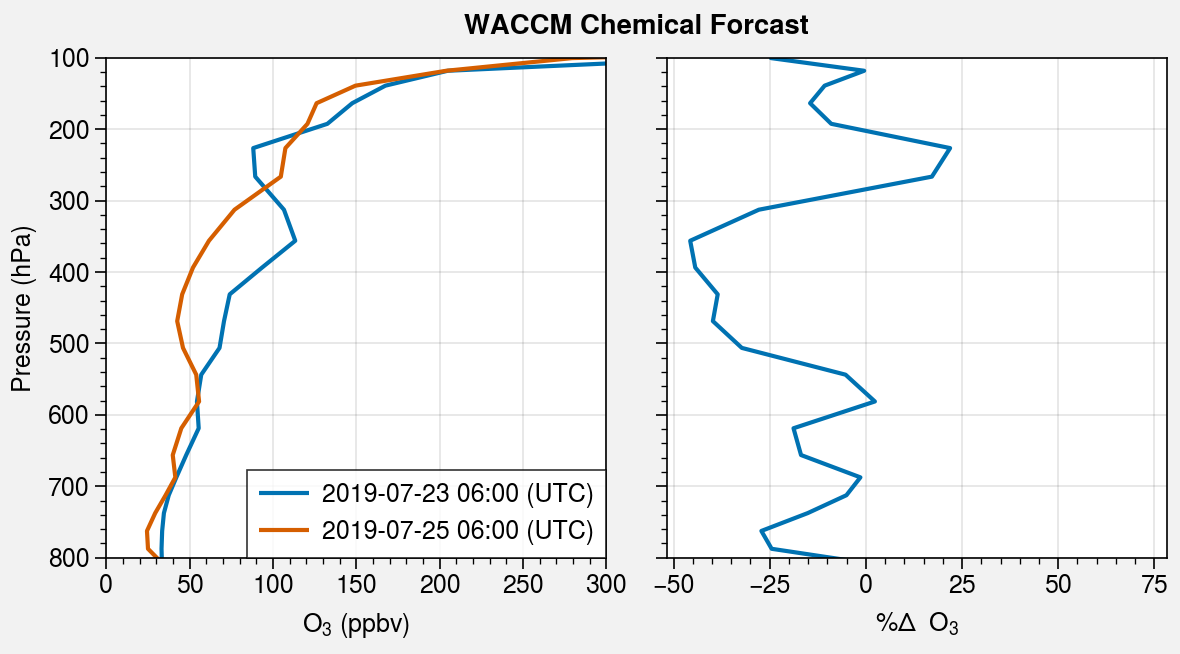

In [6]:
fig, axs = plot.subplots(ncols=2, sharey=3, sharex=0)
axs.format(ylim=(800, 100),
           suptitle='WACCM Chemical Forcast',
           )

ax = axs[0]
legend_labels = []
for t in o3.coords['time']:
    data = o3.sel(time=t)
    ts = pd.to_datetime(str(data.coords['time'].values))
    label = ts.strftime('%Y-%m-%d %H:%M (UTC)')
    legend_labels.append(label)
    m = ax.plot(data, data.coords['lev'])


handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, loc='lr', ncols=1)

ax = axs[1]
diff = o3.diff('time').isel(time=0)/o3.isel(time=0) * 1e2
ax.plot(diff, diff.coords['lev'])

axs[0].format(ylabel='Pressure (hPa)',
              xlabel='O$_3$ (ppbv)',
              xlim=(0, 300),
              )

axs[1].format(ylabel='Pressure (hPa)',
              xlabel='%$\Delta$  O$_3$',
              )

fig.savefig('../figures/waccm_profiles.png')